# Random Forest
**Problem Statement**
- Use Random Forest to prepare a model on fraud data 
- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pydotplus
from sklearn import preprocessing, datasets, tree, externals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from io import StringIO

# Ignoring anoying warnigs
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

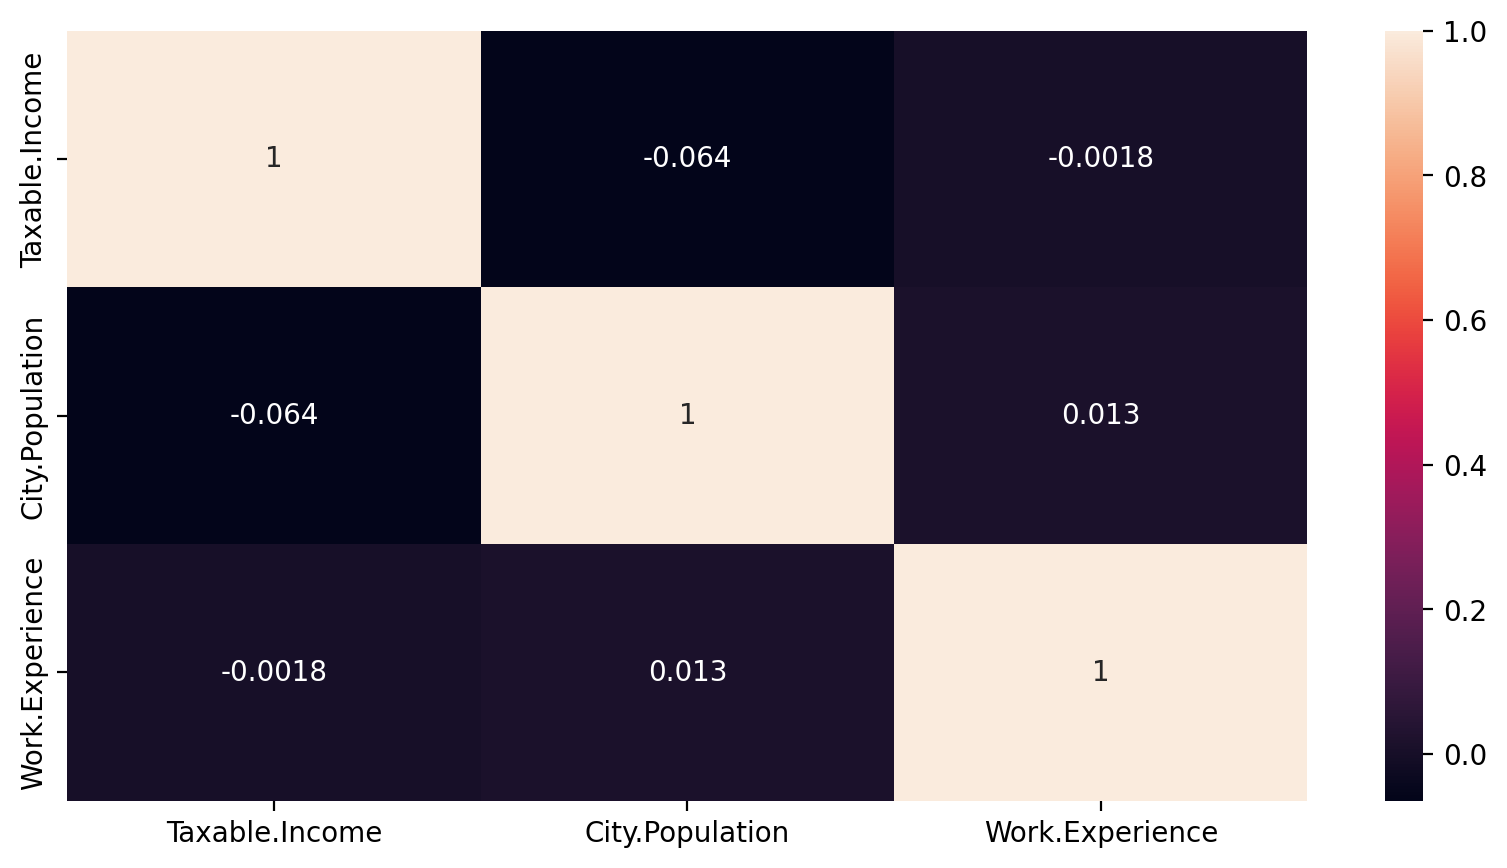

In [8]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [9]:
# Converting catagorical column into numerical column
oe = OrdinalEncoder()
cat_cols = df.select_dtypes(object).columns
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


**Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [10]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=[0,30000,100000], labels=['Risky','Good'])

df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [11]:
list(df.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [12]:
# Creating independent & dependent variables
x = df.drop(columns=['Taxable.Income'])
y = df['Taxable.Income']

In [13]:
# Splitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Checking how much data going into training & testing sets
print("Training Set :",xtrain.shape)
print("Training Set :",ytrain.shape)
print("Testing Set :",xtest.shape)
print("Testing Set :",xtest.shape)

Training Set : (480, 5)
Training Set : (480,)
Testing Set : (120, 5)
Testing Set : (120, 5)


In [14]:
ytrain.value_counts()

Good     379
Risky    101
Name: Taxable.Income, dtype: int64

In [15]:
# Building a model
model = RandomForestClassifier(n_estimators=150, n_jobs=4, oob_score=True, criterion='entropy')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print('Generalization Score :',model.oob_score_)
print("Train Accuracy : ",model.score(xtrain,ytrain))
print("Test Accuracy : ",model.score(xtest,ytest))
print("Classification Report :")
print(classification_report(ytest,ypred))

Generalization Score : 0.7291666666666666
Train Accuracy :  1.0
Test Accuracy :  0.7666666666666667
Classification Report :
              precision    recall  f1-score   support

        Good       0.80      0.95      0.87        97
       Risky       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120



In [16]:
# Training accuracy
pred_train = model.predict(xtrain)
print("Train Accuracy :",accuracy_score(ytrain,pred_train))
confusion_matrix(ytrain,pred_train)

Train Accuracy : 1.0


array([[379,   0],
       [  0, 101]], dtype=int64)

In [17]:
# Testing accuracy
pred_test = model.predict(xtest)
print("Test Accuracy :",accuracy_score(ytest,pred_test))
confusion_matrix(ytest,pred_test)

Test Accuracy : 0.7666666666666667


array([[92,  5],
       [23,  0]], dtype=int64)

In [18]:
# Creating dataframe for actual & predicted values
df_t=pd.DataFrame({'Actual':ytest, 'Predicted':pred_test})
df_t

,Actual,Predicted
446,Risky,Good
404,Good,Good
509,Risky,Good
455,Good,Good
201,Good,Good
...,...,...
5,Good,Good
224,Good,Good
159,Good,Good
38,Risky,Good


In [19]:
print("Actual values :")
df_t['Actual'].value_counts()

Actual values :


Good     97
Risky    23
Name: Actual, dtype: int64

In [20]:
print("Predicted values :")
df_t['Predicted'].value_counts()

Predicted values :


Good     115
Risky      5
Name: Predicted, dtype: int64

In [21]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,Good,50047,10,1.0
1,1.0,0.0,Good,134075,18,1.0
2,0.0,1.0,Good,160205,30,1.0
3,1.0,2.0,Good,193264,15,1.0
4,0.0,1.0,Good,27533,28,0.0


In [22]:
cols = list(df.columns)
predict = df.drop(columns=['Taxable.Income'])
target = df['Taxable.Income']

In [23]:
tree1 = model.estimators_[20]
tree1

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1217421790)

In [24]:
dot_data = StringIO()

export_graphviz(tree1, out_file=dot_data, class_names=target, filled=True, rounded=True,
                impurity=False, proportion=False, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [25]:
graph.write_png('fraud_full.png')

True

**Conclusion :**

- The accuracy of training set are 100% , so we test the accuracy on testing set which is 76%.

In [26]:
RF_small = RandomForestClassifier(n_estimators=10, max_depth=3)
RF_small.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [27]:
tree_small = RF_small.estimators_[5]
export_graphviz(tree_small, out_file = dot_data, rounded = True, precision = 1)
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_small.png')

True

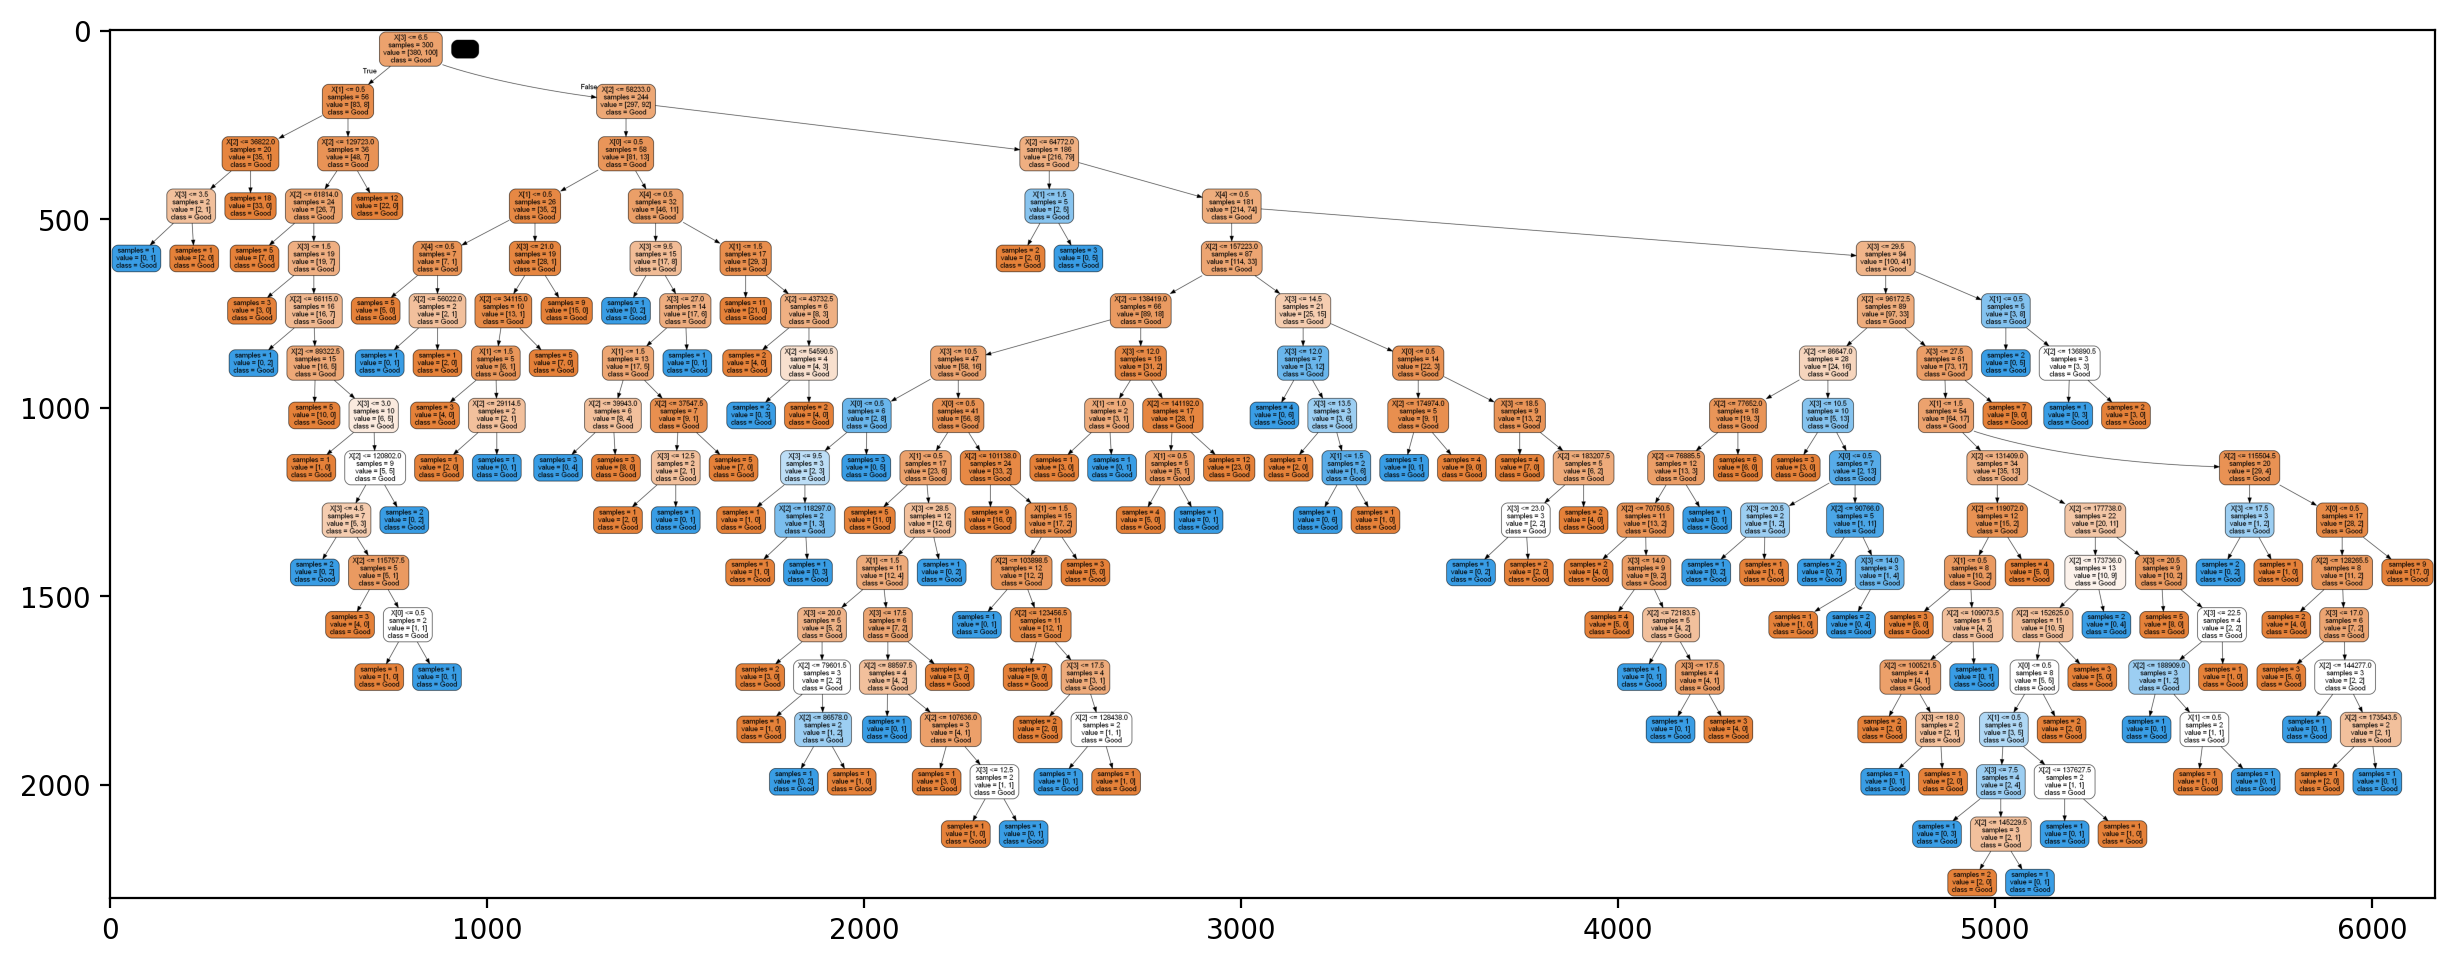

In [28]:
plt.figure(figsize=(15,8),dpi=200)
img = mpimg.imread('fraud_small.png') 
plt.imshow(img)

In [29]:
model.feature_importances_

array([0.03845792, 0.06916021, 0.52018933, 0.33210002, 0.04009252])

In [30]:
feature_imp = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
2,City.Population,0.520189
3,Work.Experience,0.332100
1,Marital.Status,0.069160
4,Urban,0.040093
0,Undergrad,0.038458


### **As we seen above table "City.Population" feature is the most important feature in the dataset.**